<a href="https://colab.research.google.com/github/jcandane/PhysicsI_Labs/blob/main/phy122_N2L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title-of-Work

Your Name

Date

#  <font color='Red'> **Import Necessary Modules** </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

π = np.pi

###  <font color='Red'> Before we start lets define the times in which all our experiments will take place. </font>

###  <font color='Red'> Define a time-increment (Δt), initial (t0), and a final (tf) time for your experiment. And with it a time_array. </font>

In [2]:
Δt = 0.1 ### s(detector)
t0 = 0 
tf = 10

timeline = np.arange(t0, tf, Δt)
T = len(timeline)

#   <font color='Red'> **Experiment I: Gravity Free-Fall** </font>

##   <font color='Red'> To begin lets start with by defining an initial position, initial velocity, and mass. </font>

In [3]:
x_0  = np.array([0., 0., 0.]) ## m
v_0  = np.array([0., 0., 0.]) ## m/s
mass = 10  ## kg

##   <font color='Red'> Now lets define our force as a function of time, f_t . </font>

In [4]:
f_gravity = mass*np.asarray([-9.81*np.ones(T), np.zeros(T), np.zeros(T)]).T

##   <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [5]:
x_t = np.zeros((len(timeline), 3))
v_t = np.zeros((len(timeline), 3))
a_t = np.zeros((len(timeline), 3))

x_t[0] = x_0
v_t[0] = v_0
a_t[0] = f_gravity[0] / mass
for t in range(1,len(timeline)):
  x_t[t] = x_t[t-1] + v_t[t-1] * Δt + 0.5 * a_t[t-1] * Δt*Δt
  a_t[t] = f_gravity[t-1] / mass
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * Δt

###   <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###   <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>

In [6]:
dxdt_t = np.gradient(x_t, axis=0)/Δt
dvdt_t = np.gradient(v_t, axis=0)/Δt

###   <font color='Red'> Make 3 plots of with: x_t, \{v_t, dxdt_t\}, and \{ a_t, dv/dt_t, & f_t/mass\} in matplotlib, all as a function of time. Make sure to include all LABELS!. </font>

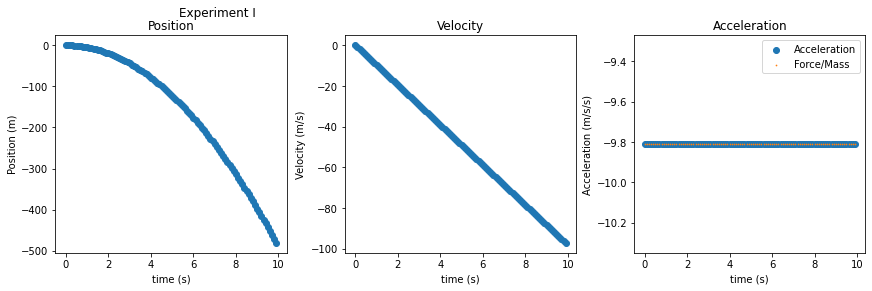

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, x_t[:,0])
ax1.set_title("Position")
ax1.set(xlabel='time (s)', ylabel='Position (m)')

ax2.scatter(timeline, v_t[:,0])
ax2.set_title("Velocity")
ax2.set(xlabel='time (s)', ylabel='Velocity (m/s)')

ax3.scatter(timeline, a_t[:,0], label="Acceleration")
ax3.scatter(timeline, f_gravity[:,0]/mass, s=0.5, label="Force/Mass")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='Acceleration (m/s/s)')

fig.show()

###   <font color='Red'> Let's replot these graphs but for the magnitude of the vectors. </font>

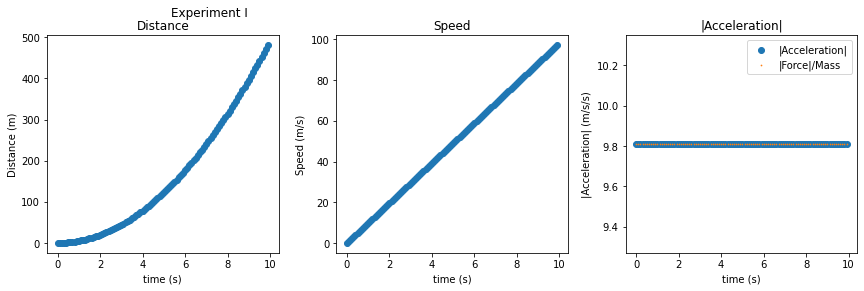

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, np.linalg.norm(x_t, axis=1))
ax1.set_title("Distance")
ax1.set(xlabel='time (s)', ylabel='Distance (m)')

ax2.scatter(timeline, np.linalg.norm(v_t, axis=1))
ax2.set_title("Speed")
ax2.set(xlabel='time (s)', ylabel='Speed (m/s)')

ax3.scatter(timeline, np.linalg.norm(a_t, axis=1), label="|Acceleration|")
ax3.scatter(timeline, np.linalg.norm(f_gravity, axis=1)/mass, s=0.5, label="|Force|/Mass")
ax3.legend(loc="upper right")
ax3.set_title("|Acceleration|")
ax3.set(xlabel='time (s)', ylabel='|Acceleration| (m/s/s)')

fig.show()

#   <font color='Red'> **Experiment II: Forces on a Cart I** </font>

###  <font color='Red'> To begin lets start with by defining an initial position & velocity, and mass. </font>

In [9]:
x_0  = np.array([1., 0., 0.]) ## m
v_0  = np.array([5., 0., 0.]) ## m/s
mass = 5 ## kg 

###  <font color='Red'> Define a force as a function of time, with a bump function. Plot the result in time. </font>

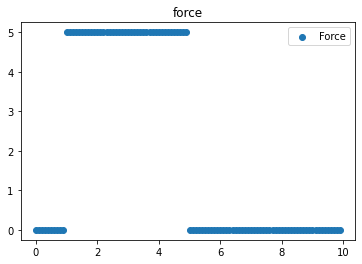

In [10]:
f_t = np.zeros( (len(timeline), 3) )
f_t[10:50,:] = 5*np.array([1.,0.,0.])

plt.scatter(timeline, f_t[:,0], label="Force")
plt.legend(loc="upper right")
plt.title("force")
plt.show()

###  <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [11]:
x_t = np.zeros((len(timeline), 3))
v_t = np.zeros((len(timeline), 3))
a_t = np.zeros((len(timeline), 3))

x_t[0] = x_0
v_t[0] = v_0
for t in range(1,len(x_t)):
  x_t[t] = x_t[t-1] + v_t[t-1] * Δt + 0.5 * a_t[t-1] * Δt*Δt
  a_t[t] = f_t[t-1] / mass
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * Δt

###  <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###  <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>


In [12]:
dxdt_t = np.gradient(x_t, axis=0)/Δt
dvdt_t = np.gradient(v_t, axis=0)/Δt

###  <font color='Red'> Make 3 plots of with: x_t, \{v_t, dxdt_t\}, and \{ a_t, dv/dt_t, and f_t/mass\} in matplotlib, all as a function of time. Make sure to include all LABELS!. </font>


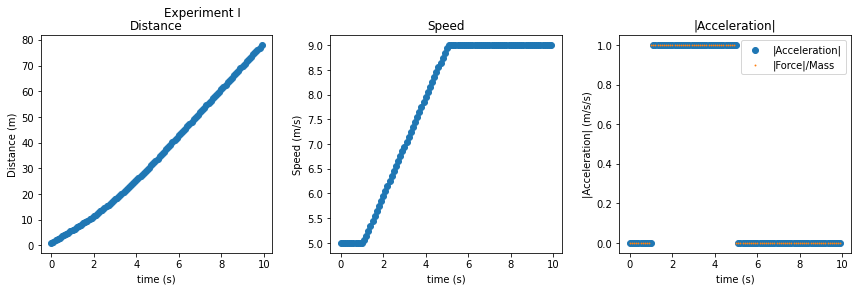

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, np.linalg.norm(x_t, axis=1))
ax1.set_title("Distance")
ax1.set(xlabel='time (s)', ylabel='Distance (m)')

ax2.scatter(timeline, np.linalg.norm(v_t, axis=1))
ax2.set_title("Speed")
ax2.set(xlabel='time (s)', ylabel='Speed (m/s)')

ax3.scatter(timeline, np.linalg.norm(a_t, axis=1), label="|Acceleration|")
ax3.scatter(timeline, np.linalg.norm(f_t, axis=1)/mass, s=0.8, label="|Force|/Mass")
ax3.legend(loc="upper right")
ax3.set_title("|Acceleration|")
ax3.set(xlabel='time (s)', ylabel='|Acceleration| (m/s/s)')

fig.show()

#   <font color='Red'> **Experiment III: Forces on a Cart II** </font>

###   <font color='Red'> To begin lets start with by defining an initial mass, position, & velocity. </font>

In [14]:
x_0  = np.array([10., 0., 0.]) ## m
v_0  = np.array([1., 0., 0.]) ## m/s
mass = 5 ## kg

###   <font color='Red'> Define a time-increment (Δt), initial (t0), and a final (tf) time for your experiment. And with it a time_array. </font>

In [15]:
Δt = 0.01 ### s(detector)
t0 = 0 
tf = 10

timeline = np.arange(t0, tf, Δt)
T = len(timeline)

###   <font color='Red'> Define a force as a function of time, with a bump function. Plot the result in time. </font>

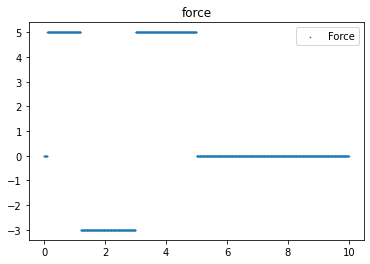

In [16]:
f_t = np.zeros( (len(timeline), 3) )
f_t[10:500]  = 5*np.array([1.,0.,0.])
f_t[120:300] = -3*np.array([1.,0.,0.])

plt.scatter(timeline, f_t[:,0], s=0.5, label="Force")
plt.legend(loc="upper right")
plt.title("force")
plt.show()

###   <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [17]:
x_t = np.zeros((len(timeline), 3))
v_t = np.zeros((len(timeline), 3))
a_t = np.zeros((len(timeline), 3))

x_t[0] = x_0
v_t[0] = v_0
for t in range(1,len(x_t)):
  x_t[t] = x_t[t-1] + v_t[t-1] * Δt + 0.5 * a_t[t-1] * Δt*Δt
  a_t[t] = f_t[t-1] / mass
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * Δt

###   <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###   <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>


In [18]:
dxdt_t = np.gradient(x_t, axis=0)/Δt
dvdt_t = np.gradient(v_t, axis=0)/Δt

###   <font color='Red'> Make 3 plots of with: x_t, \{v_t, dxdt_t\}, and \{ a_t, dvdt_t, and f_t/mass\} in matplotlib, all as a function of time. Make sure to include all LABELS!. </font>

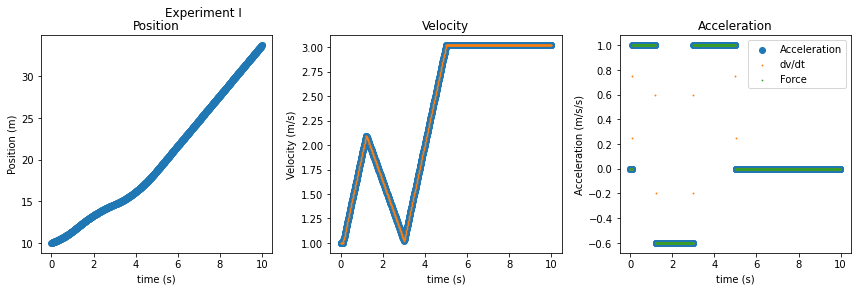

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, x_t[:,0])
ax1.set_title("Position")
ax1.set(xlabel='time (s)', ylabel='Position (m)')

ax2.scatter(timeline, v_t[:,0])
ax2.scatter(timeline, dxdt_t[:,0], s=0.5)
ax2.set_title("Velocity")
ax2.set(xlabel='time (s)', ylabel='Velocity (m/s)')

ax3.scatter(timeline, a_t[:,0], label="Acceleration")
ax3.scatter(timeline, dvdt_t[:,0], s=0.75, label="dv/dt")
ax3.scatter(timeline, f_t[:,0]/mass, s=0.5, label="Force")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='Acceleration (m/s/s)')

fig.show()

###   <font color='Red'> Write your Conclusion here, you may type in word-processor, only to copy-n-paste it here. This .ipynb file is your lab report. </font>

###   <font color='Red'> Demostrate you understand this lab, this is the most imporant part of the lab report worth half of the total points. </font>

###   <font color='Red'> Is the Force Proportional to the Acceleration? </font>

####   <font color='Red'> Answer while referencing your simulations. </font>

###   <font color='Red'> Do objects with different masses fall at the same rate? </font>

####   <font color='Red'> That is neglecting air-resistance and in the same environment. Answer while referencing your simulations. </font>